# Importing images

There are different types of libraries to import data: generalistic ones that can open common formats like jpg, tiff, png etc., domain-specific ones that are able to open data generated in a given domain such as microscopy, and format-specific ones that can open a single highly-specialized type of data such as DICOM (medical imaging), ENVI (remote sensing) etc. Here we describe a few of those libraries.

## scikit-image

scikit-image doesn't implement an image reader itself but relies on various other packages "under the hood". For common formats it's the simplest to use as it doesn't require to import another package. By default, scikit-image will try the different readers ("plugins") it has available when ```imread``` is called:

In [1]:
import skimage
import numpy as np
from microfilm.microplot import microshow

In [2]:
image = skimage.io.imread('../data/drosophila_embryo_30567.tif')

In [3]:
image.shape

(31, 5, 2, 206, 246)

This provides a simple Numpy array as output. Note that with this approach any metadata regarding pixel size, scale, dimensions etc. is lost.

Note also that you can provide either a local path to your image (absolute or relative) or a url. For example this works too:

In [4]:
image = skimage.io.imread('https://zenodo.org/record/4485316/files/Flue-N2DH-GOWT1_02_GT.tif?download=1')

In [5]:
image.shape

(92, 1024, 1024)

## imageio

imageio is a library capable of reading and writing a very [extensive list of image formats](https://imageio.readthedocs.io/en/stable/formats/index.html). It is straightforward to use:



In [6]:
import imageio.v3 as iio

In [7]:
im = iio.imread('../data/IMG_0017.jpeg')

In [8]:
im.shape

(3024, 4032, 3)

## Domain-specific: aicsimageio

Microscopy is characterized by a multitude of different formats which are more or less proprietary. The Allen Institute of Cell Sciences has created a library, [```aicsimageio```](https://allencellmodeling.github.io/aicsimageio/), to open a series of them. It also allows to recover metadata about the image (if it has been stored properly).

The mechanisms here is a bit different: we define an *object* by specifying the image location and then we request information from that object. For example we can open a czi file from the Zeiss manufacturer.

In [9]:
from aicsimageio import AICSImage

In [10]:
myfile = AICSImage('../data/EmbryoTorax2D-HR.czi')

Now we can extract information about the dimensions:

In [11]:
myfile.dims

<Dimensions [T: 1, C: 3, Z: 1, Y: 2048, X: 2048]>

We see that we have a 2048x2048 image with 3 channels. Naturally we can also access the actual pixel values in the form of an array:

In [12]:
mypixels = myfile.data

In [13]:
mypixels.shape

(1, 3, 1, 2048, 2048)

If the image is very large, we may not want to import the full dataset. We can also specify what exactly to import. For example just the first channel in a specific order of dimensions:

In [14]:
mypixels_t0 = myfile.get_image_data(dimension_order_out="YX", C=1)

In [15]:
mypixels_t0.shape

(2048, 2048)

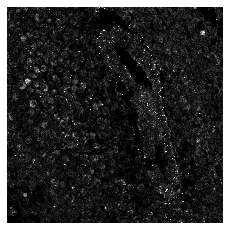

In [16]:
microshow(mypixels_t0);

Note that the library offers some more advanced data formats (dask arrays) that allow one to perform computations on image blocks in case we are dealing with very large images. We will learn more about this when exploring the Dask library.

## File-specific: ENVI

ENVI is a format used in remote sensing and other areas using multi-channel imaging (e.g. hyperspectral imaging). To read these data in Python, one can use the Spectral Python (SPy) library:

In [17]:
import spectral.io

The image we use here is a old postcard imaged using hyperspectral imaging (https://zenodo.org/record/7763151). Typically such data are large and the full image is not returned. Rather information about the image is read and then one can import parts of the image:

In [19]:
image_object = spectral.io.envi.open('../data/22-10-20-PC-HSI.hdr')

In [20]:
image_object

	Data Source:   './../data/22-10-20-PC-HSI.raw'
	# Rows:            477
	# Samples:         484
	# Bands:           304
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

Here we see a summary of this object. For example we see that 304 different channels were imported. Now one can specifically import chosen "bands" or wavelengths:

In [21]:
im_envi = image_object.read_bands([120, 40, 80])

In [22]:
im_envi.shape

(477, 484, 3)

In [23]:
from microfilm.microplot import microshow

Now we can plot the result:

In [24]:
image_object.metadata['wavelength'][80]

'525.57'

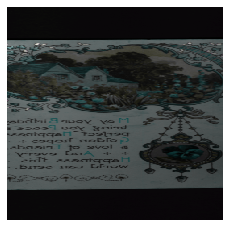

In [25]:
microshow(np.moveaxis(im_envi, 2, 0));

## Exercise

1. Read one of the tif files that you can find in this Zenodo repository using scikit-image: https://zenodo.org/record/4266199#.YsKgKuzP2rM

2. Download the file ```20180209_mitoBFP_Drp1GFP_KDEL-RFP.lif``` at https://zenodo.org/record/4648097/ either manually or using the code below. Then try to open it using ```aicsimageio```. Does it work? Do you understand the error message and how you could solve it?

3. What are the dimensions of the image?

In [88]:
import requests
response = requests.get('https://zenodo.org/record/4648097/files/20180209_mitoBFP_Drp1GFP_KDEL-RFP.lif?download=1')
open("../data/20180209_mitoBFP_Drp1GFP_KDEL-RFP.lif", "wb").write(response.content)

145617141